In [267]:
from pymongo import MongoClient
from pathlib import Path
import os
from pprint import pprint
import nltk
import matplotlib.pyplot as plt
import pprint

In [249]:
client = MongoClient('mongodb://localhost:27017')
testDb = client.testDb

In [250]:
patients = testDb.patients
sessions = testDb.sessions
reports = testDb.reports

In [251]:
def fileName(filePath):
    return (os.path.splitext(os.path.split(filePath)[1]))[0]

def fileExt(filePath):
    return (os.path.splitext(os.path.split(filePath)[1]))[1]

In [252]:
p1 = os.listdir("v1.2.0/eval")
print(p1)
print(os.path.isdir(p1[0]))
print(os.path.isfile(p1[1]))
pathString = ("/"+str(p1[0]))
print(pathString)
patientDict = {}
fileNames = []
maxFileSize = 0 
maxFileName = ""
for root,dirs,files in os.walk("v1.2.0"):
    #print ("root: ",root)
    #print("\tdirs: ",dirs)
    #print("\t\t",str(files))
        
    if len(files)>0:
        for file in files:
            fileNames.append(str(root)+"/"+str(file))
            if os.path.getsize((str(root)+"/"+file)) > maxFileSize:
                maxFileSize = os.path.getsize((str(root)+"/"+file))
                maxFileName = (str(root)+"/"+file)
            else:
                continue
            
            
        #print ("\t\tFile: "+files[3])
        
print (maxFileName," : ",maxFileSize)
print (os.path.splitext(maxFileName))
print (os.path.split(maxFileName))
print (os.path.splitext(os.path.split(maxFileName)[1]))
print (fileName(maxFileName))
print (fileExt(maxFileName))

['03_tcp_ar_a', '02_tcp_le', '.DS_Store', '01_tcp_ar']
False
False
/03_tcp_ar_a
v1.2.0/eval/01_tcp_ar/00001278/s002_2003_11_17/00001278_s002_t001.edf  :  67899648
('v1.2.0/eval/01_tcp_ar/00001278/s002_2003_11_17/00001278_s002_t001', '.edf')
('v1.2.0/eval/01_tcp_ar/00001278/s002_2003_11_17', '00001278_s002_t001.edf')
('00001278_s002_t001', '.edf')
00001278_s002_t001
.edf


In [274]:
#print(fileNames[0:30])
testDb.patients.delete_many({})
testDb.sessions.delete_many({})
testDb.reports.delete_many({})

'''for files in fileNames[30:50]:
    print(files)
    print (files.split("/"))
    print ("File Ext: "+fileExt(files))
    print ("File Name: ",fileName(files),"\n")
'''

patientList = []
patientSessions = []
sessionList = []
currentSession = 0
sessionEntry = {}
for files in fileNames:
    splitFile = files.split("/")
    #print(splitFile)
    if len(splitFile)<6:
        pass
    else:
        patientId = splitFile[3]
        
        currentFile = splitFile[5]
        currentFileSplit = currentFile.split('_')
        sessionNumber = currentFileSplit[1]
        patientId = currentFileSplit[0]
        sessionId = str(patientId)+str(sessionNumber)
        print("\t\t\t splitFile: ",currentFileSplit)
        #print("\t\tFilePath: "+files)
        currentFileExt = str(fileExt(currentFile))
        print("\tCurrent File: "+currentFile) 
        if currentSession != sessionId: 
            currentSession = sessionId
            if bool(sessionEntry) == True:
                #Insert session into patient session list
                sessionEntry['edfList'] = edfList
                sessionEntry['lblList'] = lblList
                sessionEntry['tseList'] = tseList
                #print("CurrentSession: "+currentSession)
                print("Adding Session!!!")
                sessions.insert_one(sessionEntry)
                sessionEntry = {}
            else:            #Found a new session
                print("Found an empty Session")
                print(sessionEntry)
                sessionEntry = {'sessionId':sessionId}
                sessionEntry['patientId'] = patientId
                lblList = []
                edfList = []
                tseList = []
                tseBiList = []
                lblBiList = []
            
        else:
            if currentFileExt == ".txt":
                sessionEntry['Report'] = currentFile
                try:
                    with open(str(files),'r') as reportFile:
                        rText = reportFile.readlines()      
                    sessionEntry['ReportText'] = rText
                except UnicodeDecodeError:
                    sessionEntry['ReportText'] = "Error Opening Report"
            elif currentFileExt  == ".edf":
                edfList.append(currentFile)
            elif currentFileExt == ".lbl":
                lblList.append(currentFile)
            elif currentFileExt == ".tse":
                tseList.append(currentFile)
                
            if patientId in patientList:
                #Add Session Id to patient sessions
                #Find patient entry, add session 
                continue
            else:
                #Add sessionId to patient session
                patients.insert_one({'patientId':patientId})
                patientList.append(patientId)

            '''if sessionId in sessionList:
                continue
            else:
                sessionList.append(sessionId)
                if patientId in patientLi[=st:
                    sessions.update_one({"patientId":patientId},{'$push':{"sessionsId":sessionId}})
                else:
                    sessions.insert_one({{'patientId':patientId},{'sessionId':[sessionId]}})
            '''
        currentSession = sessionId
#print (patientList)
print (len(patientList))

			 splitFile:  ['00005943', 's002.txt']
		FilePath: v1.2.0/eval/03_tcp_ar_a/00005943/s002_2009_06_28/00005943_s002.txt
	Current File: 00005943_s002.txt
Found an empty Session
{}
			 splitFile:  ['00005943', 's002', 't002.lbl', 'bi']
		FilePath: v1.2.0/eval/03_tcp_ar_a/00005943/s002_2009_06_28/00005943_s002_t002.lbl_bi
	Current File: 00005943_s002_t002.lbl_bi
Adding Session!!!
			 splitFile:  ['00005943', 's002', 't001.tse', 'bi']
		FilePath: v1.2.0/eval/03_tcp_ar_a/00005943/s002_2009_06_28/00005943_s002_t001.tse_bi
	Current File: 00005943_s002_t001.tse_bi
			 splitFile:  ['00005943', 's002', 't000.lbl', 'bi']
		FilePath: v1.2.0/eval/03_tcp_ar_a/00005943/s002_2009_06_28/00005943_s002_t000.lbl_bi
	Current File: 00005943_s002_t000.lbl_bi
			 splitFile:  ['00005943', 's002', 't003.tse', 'bi']
		FilePath: v1.2.0/eval/03_tcp_ar_a/00005943/s002_2009_06_28/00005943_s002_t003.tse_bi
	Current File: 00005943_s002_t003.tse_bi
			 splitFile:  ['00005943', 's002', 't002.lbl']
		FilePath: v1.2.0/eva

			 splitFile:  ['00002297', 's003', 't000.tse', 'bi']
		FilePath: v1.2.0/eval/03_tcp_ar_a/00002297/s003_2007_10_23/00002297_s003_t000.tse_bi
	Current File: 00002297_s003_t000.tse_bi
			 splitFile:  ['00002297', 's003', 't003.lbl', 'bi']
		FilePath: v1.2.0/eval/03_tcp_ar_a/00002297/s003_2007_10_23/00002297_s003_t003.lbl_bi
	Current File: 00002297_s003_t003.lbl_bi
			 splitFile:  ['00002297', 's003', 't001.edf']
		FilePath: v1.2.0/eval/03_tcp_ar_a/00002297/s003_2007_10_23/00002297_s003_t001.edf
	Current File: 00002297_s003_t001.edf
			 splitFile:  ['00002297', 's003', 't000.edf']
		FilePath: v1.2.0/eval/03_tcp_ar_a/00002297/s003_2007_10_23/00002297_s003_t000.edf
	Current File: 00002297_s003_t000.edf
			 splitFile:  ['00002297', 's003', 't002.edf']
		FilePath: v1.2.0/eval/03_tcp_ar_a/00002297/s003_2007_10_23/00002297_s003_t002.edf
	Current File: 00002297_s003_t002.edf
			 splitFile:  ['00002297', 's003', 't002.tse', 'bi']
		FilePath: v1.2.0/eval/03_tcp_ar_a/00002297/s003_2007_10_23/00002

		FilePath: v1.2.0/eval/02_tcp_le/00003635/s001_2006_07_20/00003635_s001_t000.lbl_bi
	Current File: 00003635_s001_t000.lbl_bi
Adding Session!!!
			 splitFile:  ['00003635', 's001', 't000.edf']
		FilePath: v1.2.0/eval/02_tcp_le/00003635/s001_2006_07_20/00003635_s001_t000.edf
	Current File: 00003635_s001_t000.edf
			 splitFile:  ['00003635', 's001', 't001.edf']
		FilePath: v1.2.0/eval/02_tcp_le/00003635/s001_2006_07_20/00003635_s001_t001.edf
	Current File: 00003635_s001_t001.edf
			 splitFile:  ['00003635', 's001', 't001.tse', 'bi']
		FilePath: v1.2.0/eval/02_tcp_le/00003635/s001_2006_07_20/00003635_s001_t001.tse_bi
	Current File: 00003635_s001_t001.tse_bi
			 splitFile:  ['00003635', 's001', 't000.tse']
		FilePath: v1.2.0/eval/02_tcp_le/00003635/s001_2006_07_20/00003635_s001_t000.tse
	Current File: 00003635_s001_t000.tse
			 splitFile:  ['00003635', 's001', 't000.lbl']
		FilePath: v1.2.0/eval/02_tcp_le/00003635/s001_2006_07_20/00003635_s001_t000.lbl
	Current File: 00003635_s001_t000.lbl

			 splitFile:  ['00008453', 's006', 't000.tse']
		FilePath: v1.2.0/eval/01_tcp_ar/00008453/s006_2012_03_06/00008453_s006_t000.tse
	Current File: 00008453_s006_t000.tse
			 splitFile:  ['00008453', 's006', 't000.lbl']
		FilePath: v1.2.0/eval/01_tcp_ar/00008453/s006_2012_03_06/00008453_s006_t000.lbl
	Current File: 00008453_s006_t000.lbl
			 splitFile:  ['00008453', 's006', 't000.edf']
		FilePath: v1.2.0/eval/01_tcp_ar/00008453/s006_2012_03_06/00008453_s006_t000.edf
	Current File: 00008453_s006_t000.edf
			 splitFile:  ['00008453', 's006', 't000.lbl', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00008453/s006_2012_03_06/00008453_s006_t000.lbl_bi
	Current File: 00008453_s006_t000.lbl_bi
			 splitFile:  ['00008453', 's006.txt']
		FilePath: v1.2.0/eval/01_tcp_ar/00008453/s006_2012_03_06/00008453_s006.txt
	Current File: 00008453_s006.txt
Adding Session!!!
			 splitFile:  ['00008453', 's003', 't000.tse', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00008453/s003_2012_01_26/00008453_s003_t000.tse_bi
	Cu

			 splitFile:  ['00008544', 's004', 't011.lbl', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00008544/s004_2012_01_04/00008544_s004_t011.lbl_bi
	Current File: 00008544_s004_t011.lbl_bi
			 splitFile:  ['00008544', 's004', 't002.lbl']
		FilePath: v1.2.0/eval/01_tcp_ar/00008544/s004_2012_01_04/00008544_s004_t002.lbl
	Current File: 00008544_s004_t002.lbl
			 splitFile:  ['00008544', 's004', 't003.lbl', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00008544/s004_2012_01_04/00008544_s004_t003.lbl_bi
	Current File: 00008544_s004_t003.lbl_bi
			 splitFile:  ['00008544', 's011', 't006.edf']
		FilePath: v1.2.0/eval/01_tcp_ar/00008544/s011_2012_01_08/00008544_s011_t006.edf
	Current File: 00008544_s011_t006.edf
Adding Session!!!
			 splitFile:  ['00008544', 's011', 't007.edf']
		FilePath: v1.2.0/eval/01_tcp_ar/00008544/s011_2012_01_08/00008544_s011_t007.edf
	Current File: 00008544_s011_t007.edf
			 splitFile:  ['00008544', 's011', 't011.edf']
		FilePath: v1.2.0/eval/01_tcp_ar/00008544/s011_2012_01_08/00008

			 splitFile:  ['00002289', 's004', 't005.tse', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00002289/s004_2012_03_13/00002289_s004_t005.tse_bi
	Current File: 00002289_s004_t005.tse_bi
			 splitFile:  ['00002289', 's004', 't006.lbl', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00002289/s004_2012_03_13/00002289_s004_t006.lbl_bi
	Current File: 00002289_s004_t006.lbl_bi
			 splitFile:  ['00002289', 's004', 't000.tse']
		FilePath: v1.2.0/eval/01_tcp_ar/00002289/s004_2012_03_13/00002289_s004_t000.tse
	Current File: 00002289_s004_t000.tse
			 splitFile:  ['00002289', 's004', 't000.lbl']
		FilePath: v1.2.0/eval/01_tcp_ar/00002289/s004_2012_03_13/00002289_s004_t000.lbl
	Current File: 00002289_s004_t000.lbl
			 splitFile:  ['00002289', 's004', 't005.tse']
		FilePath: v1.2.0/eval/01_tcp_ar/00002289/s004_2012_03_13/00002289_s004_t005.tse
	Current File: 00002289_s004_t005.tse
			 splitFile:  ['00002289', 's004', 't011.tse']
		FilePath: v1.2.0/eval/01_tcp_ar/00002289/s004_2012_03_13/00002289_s004_t011.tse


	Current File: 00008550_s001_t000.tse
Adding Session!!!
			 splitFile:  ['00008550', 's001', 't000.lbl']
		FilePath: v1.2.0/eval/01_tcp_ar/00008550/s001_2012_01_27/00008550_s001_t000.lbl
	Current File: 00008550_s001_t000.lbl
			 splitFile:  ['00008550', 's001', 't000.edf']
		FilePath: v1.2.0/eval/01_tcp_ar/00008550/s001_2012_01_27/00008550_s001_t000.edf
	Current File: 00008550_s001_t000.edf
			 splitFile:  ['00008550', 's001', 't000.lbl', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00008550/s001_2012_01_27/00008550_s001_t000.lbl_bi
	Current File: 00008550_s001_t000.lbl_bi
			 splitFile:  ['00008550', 's001.txt']
		FilePath: v1.2.0/eval/01_tcp_ar/00008550/s001_2012_01_27/00008550_s001.txt
	Current File: 00008550_s001.txt
Found an empty Session
{}
			 splitFile:  ['00008550', 's001', 't000.tse', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00008550/s001_2012_01_27/00008550_s001_t000.tse_bi
	Current File: 00008550_s001_t000.tse_bi
Adding Session!!!
			 splitFile:  ['00008550', 's002', 't000.lbl', 

			 splitFile:  ['00008889', 's003', 't009.lbl']
		FilePath: v1.2.0/eval/01_tcp_ar/00008889/s003_2012_03_20/00008889_s003_t009.lbl
	Current File: 00008889_s003_t009.lbl
			 splitFile:  ['00008889', 's003', 't008.lbl']
		FilePath: v1.2.0/eval/01_tcp_ar/00008889/s003_2012_03_20/00008889_s003_t008.lbl
	Current File: 00008889_s003_t008.lbl
			 splitFile:  ['00008889', 's003', 't008.tse']
		FilePath: v1.2.0/eval/01_tcp_ar/00008889/s003_2012_03_20/00008889_s003_t008.tse
	Current File: 00008889_s003_t008.tse
			 splitFile:  ['00008889', 's003', 't007.tse', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00008889/s003_2012_03_20/00008889_s003_t007.tse_bi
	Current File: 00008889_s003_t007.tse_bi
			 splitFile:  ['00008889', 's003', 't004.lbl', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00008889/s003_2012_03_20/00008889_s003_t004.lbl_bi
	Current File: 00008889_s003_t004.lbl_bi
			 splitFile:  ['00008889', 's003', 't008.lbl', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00008889/s003_2012_03_20/00008889_s003_t00

			 splitFile:  ['00009570', 's003', 't003.lbl', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00009570/s003_2012_11_07/00009570_s003_t003.lbl_bi
	Current File: 00009570_s003_t003.lbl_bi
			 splitFile:  ['00009570', 's003', 't002.tse', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00009570/s003_2012_11_07/00009570_s003_t002.tse_bi
	Current File: 00009570_s003_t002.tse_bi
			 splitFile:  ['00009570', 's003', 't001.lbl', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00009570/s003_2012_11_07/00009570_s003_t001.lbl_bi
	Current File: 00009570_s003_t001.lbl_bi
			 splitFile:  ['00009570', 's003', 't001.lbl']
		FilePath: v1.2.0/eval/01_tcp_ar/00009570/s003_2012_11_07/00009570_s003_t001.lbl
	Current File: 00009570_s003_t001.lbl
			 splitFile:  ['00009570', 's003', 't001.tse']
		FilePath: v1.2.0/eval/01_tcp_ar/00009570/s003_2012_11_07/00009570_s003_t001.tse
	Current File: 00009570_s003_t001.tse
			 splitFile:  ['00009570', 's003', 't000.tse']
		FilePath: v1.2.0/eval/01_tcp_ar/00009570/s003_2012_11_07/00009570_s0

			 splitFile:  ['00009578', 's012', 't003.edf']
		FilePath: v1.2.0/eval/01_tcp_ar/00009578/s012_2013_08_14/00009578_s012_t003.edf
	Current File: 00009578_s012_t003.edf
			 splitFile:  ['00009578', 's012', 't010.tse', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00009578/s012_2013_08_14/00009578_s012_t010.tse_bi
	Current File: 00009578_s012_t010.tse_bi
			 splitFile:  ['00009578', 's012', 't002.tse', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00009578/s012_2013_08_14/00009578_s012_t002.tse_bi
	Current File: 00009578_s012_t002.tse_bi
			 splitFile:  ['00009578', 's012', 't001.edf']
		FilePath: v1.2.0/eval/01_tcp_ar/00009578/s012_2013_08_14/00009578_s012_t001.edf
	Current File: 00009578_s012_t001.edf
			 splitFile:  ['00009578', 's012', 't000.edf']
		FilePath: v1.2.0/eval/01_tcp_ar/00009578/s012_2013_08_14/00009578_s012_t000.edf
	Current File: 00009578_s012_t000.edf
			 splitFile:  ['00009578', 's012', 't001.lbl', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00009578/s012_2013_08_14/00009578_s012_t00

Found an empty Session
{}
			 splitFile:  ['00009578', 's005', 't000.tse', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00009578/s005_2013_03_02/00009578_s005_t000.tse_bi
	Current File: 00009578_s005_t000.tse_bi
			 splitFile:  ['00009578', 's023', 't002.tse', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00009578/s023_2013_08_19/00009578_s023_t002.tse_bi
	Current File: 00009578_s023_t002.tse_bi
Adding Session!!!
			 splitFile:  ['00009578', 's023', 't001.lbl', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00009578/s023_2013_08_19/00009578_s023_t001.lbl_bi
	Current File: 00009578_s023_t001.lbl_bi
			 splitFile:  ['00009578', 's023', 't000.tse', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00009578/s023_2013_08_19/00009578_s023_t000.tse_bi
	Current File: 00009578_s023_t000.tse_bi
			 splitFile:  ['00009578', 's023.txt']
		FilePath: v1.2.0/eval/01_tcp_ar/00009578/s023_2013_08_19/00009578_s023.txt
	Current File: 00009578_s023.txt
Found an empty Session
{}
			 splitFile:  ['00009578', 's023', 't000.lbl']
		File

	Current File: 00009578_s034_t009.lbl_bi
			 splitFile:  ['00009578', 's034', 't005.lbl', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00009578/s034_2013_08_27/00009578_s034_t005.lbl_bi
	Current File: 00009578_s034_t005.lbl_bi
			 splitFile:  ['00009578', 's034', 't007.edf']
		FilePath: v1.2.0/eval/01_tcp_ar/00009578/s034_2013_08_27/00009578_s034_t007.edf
	Current File: 00009578_s034_t007.edf
			 splitFile:  ['00009578', 's030', 't000.edf']
		FilePath: v1.2.0/eval/01_tcp_ar/00009578/s030_2013_08_23/00009578_s030_t000.edf
	Current File: 00009578_s030_t000.edf
Adding Session!!!
			 splitFile:  ['00009578', 's030', 't001.edf']
		FilePath: v1.2.0/eval/01_tcp_ar/00009578/s030_2013_08_23/00009578_s030_t001.edf
	Current File: 00009578_s030_t001.edf
			 splitFile:  ['00009578', 's030', 't003.edf']
		FilePath: v1.2.0/eval/01_tcp_ar/00009578/s030_2013_08_23/00009578_s030_t003.edf
	Current File: 00009578_s030_t003.edf
			 splitFile:  ['00009578', 's030', 't002.tse', 'bi']
		FilePath: v1.2.0/eval/01_tc

	Current File: 00010062_s004_t002.tse
			 splitFile:  ['00010062', 's004', 't002.lbl']
		FilePath: v1.2.0/eval/01_tcp_ar/00010062/s004_2013_03_27/00010062_s004_t002.lbl
	Current File: 00010062_s004_t002.lbl
			 splitFile:  ['00010062', 's004', 't000.tse', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00010062/s004_2013_03_27/00010062_s004_t000.tse_bi
	Current File: 00010062_s004_t000.tse_bi
			 splitFile:  ['00010062', 's004', 't000.lbl']
		FilePath: v1.2.0/eval/01_tcp_ar/00010062/s004_2013_03_27/00010062_s004_t000.lbl
	Current File: 00010062_s004_t000.lbl
			 splitFile:  ['00010062', 's004', 't000.tse']
		FilePath: v1.2.0/eval/01_tcp_ar/00010062/s004_2013_03_27/00010062_s004_t000.tse
	Current File: 00010062_s004_t000.tse
			 splitFile:  ['00010062', 's004', 't001.tse']
		FilePath: v1.2.0/eval/01_tcp_ar/00010062/s004_2013_03_27/00010062_s004_t001.tse
	Current File: 00010062_s004_t001.tse
			 splitFile:  ['00010062', 's004', 't003.lbl', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00010062/s004_20

			 splitFile:  ['00009839', 's007', 't005.lbl', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00009839/s007_2013_07_22/00009839_s007_t005.lbl_bi
	Current File: 00009839_s007_t005.lbl_bi
			 splitFile:  ['00009839', 's007', 't009.lbl', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00009839/s007_2013_07_22/00009839_s007_t009.lbl_bi
	Current File: 00009839_s007_t009.lbl_bi
			 splitFile:  ['00009839', 's007', 't006.tse', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00009839/s007_2013_07_22/00009839_s007_t006.tse_bi
	Current File: 00009839_s007_t006.tse_bi
			 splitFile:  ['00009839', 's007', 't014.tse', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00009839/s007_2013_07_22/00009839_s007_t014.tse_bi
	Current File: 00009839_s007_t014.tse_bi
			 splitFile:  ['00009839', 's007', 't010.tse', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00009839/s007_2013_07_22/00009839_s007_t010.tse_bi
	Current File: 00009839_s007_t010.tse_bi
			 splitFile:  ['00009839', 's007', 't002.tse', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/000098

		FilePath: v1.2.0/eval/01_tcp_ar/00008512/s003_2012_01_10/00008512_s003_t003.edf
	Current File: 00008512_s003_t003.edf
			 splitFile:  ['00008512', 's003', 't004.lbl', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00008512/s003_2012_01_10/00008512_s003_t004.lbl_bi
	Current File: 00008512_s003_t004.lbl_bi
			 splitFile:  ['00008512', 's003', 't002.edf']
		FilePath: v1.2.0/eval/01_tcp_ar/00008512/s003_2012_01_10/00008512_s003_t002.edf
	Current File: 00008512_s003_t002.edf
			 splitFile:  ['00008512', 's003', 't002.tse', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00008512/s003_2012_01_10/00008512_s003_t002.tse_bi
	Current File: 00008512_s003_t002.tse_bi
			 splitFile:  ['00008512', 's003', 't001.lbl', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00008512/s003_2012_01_10/00008512_s003_t001.lbl_bi
	Current File: 00008512_s003_t001.lbl_bi
			 splitFile:  ['00008512', 's003', 't000.tse', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00008512/s003_2012_01_10/00008512_s003_t000.tse_bi
	Current File: 00008512_s003

		FilePath: v1.2.0/eval/01_tcp_ar/00006546/s021_2012_02_22/00006546_s021_t008.lbl
	Current File: 00006546_s021_t008.lbl
Found an empty Session
{}
			 splitFile:  ['00006546', 's021', 't008.tse']
		FilePath: v1.2.0/eval/01_tcp_ar/00006546/s021_2012_02_22/00006546_s021_t008.tse
	Current File: 00006546_s021_t008.tse
			 splitFile:  ['00006546', 's021', 't003.lbl', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00006546/s021_2012_02_22/00006546_s021_t003.lbl_bi
	Current File: 00006546_s021_t003.lbl_bi
			 splitFile:  ['00006546', 's021', 't000.tse', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00006546/s021_2012_02_22/00006546_s021_t000.tse_bi
	Current File: 00006546_s021_t000.tse_bi
			 splitFile:  ['00006546', 's021', 't001.lbl', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00006546/s021_2012_02_22/00006546_s021_t001.lbl_bi
	Current File: 00006546_s021_t001.lbl_bi
			 splitFile:  ['00006546', 's021', 't010.tse', 'bi']
		FilePath: v1.2.0/eval/01_tcp_ar/00006546/s021_2012_02_22/00006546_s021_t010.tse_bi
	C

In [275]:
pprint.pprint(sessions.find_one())
pprint.pprint(sessions.find_one({"patientId":'00006546'}))

{'_id': ObjectId('5a916236e8dafe3af5e59ae4'),
 'edfList': ['v1.2.0/eval/03_tcp_ar_a/00005943/s002_2009_06_28/00005943_s002_t001.edf',
             'v1.2.0/eval/03_tcp_ar_a/00005943/s002_2009_06_28/00005943_s002_t000.edf',
             'v1.2.0/eval/03_tcp_ar_a/00005943/s002_2009_06_28/00005943_s002_t002.edf',
             'v1.2.0/eval/03_tcp_ar_a/00005943/s002_2009_06_28/00005943_s002_t003.edf'],
 'lblList': ['v1.2.0/eval/03_tcp_ar_a/00005943/s002_2009_06_28/00005943_s002_t002.lbl',
             'v1.2.0/eval/03_tcp_ar_a/00005943/s002_2009_06_28/00005943_s002_t003.lbl',
             'v1.2.0/eval/03_tcp_ar_a/00005943/s002_2009_06_28/00005943_s002_t001.lbl',
             'v1.2.0/eval/03_tcp_ar_a/00005943/s002_2009_06_28/00005943_s002_t000.lbl'],
 'patientId': '00005943',
 'reportText': ['\n',
                'CLINICAL HISTORY: 69 year old female with refractory status '
                'epilepticus following craniotomy for subdural hematoma.\n',
                '\n',
                'MEDIC

In [254]:
patientDbPrint = patients.find({})
sessionsDb = sessions.find({})
sessionList = []
for session in sessionsDb:
    if len(session.keys())>4:
        sessionList.append(session)
    #print(session)
    
reportText1 = sessionList[0]['ReportText']

reportTextString = " ".join(reportText1)

#print(reportTextString)

reportTextStringList = reportTextString.split(" ")

fDist = nltk.FreqDist(reportTextStringList)
print(fDist.items())
#print(reportTextStringList)

'''for x in reportText1:
    print("\t"+x)
    print("\n")
    

for patient in patientDbPrint:
    print(patient)
'''

dict_items([('CLINICAL', 2), ('HISTORY:', 1), ('40', 1), ('year', 1), ('old', 1), ('right', 4), ('handed', 1), ('male', 1), ('with', 8), ('encephalitis', 1), ('and', 15), ('recurrent', 1), ('seizures.\n', 1), ('MEDICATIONS:', 1), ('Lacosamide,', 1), ('dilantin,', 1), ('Ativan,', 1), ('Klonopin\n', 1), ('INTRODUCTION:', 1), ('Continuous', 1), ('digital', 1), ('video', 1), ('EEG', 5), ('monitoring', 3), ('was', 3), ('performed', 1), ('at', 10), ('bedside', 1), ('using', 1), ('standard', 1), ('10-20', 1), ('system', 1), ('of', 9), ('electrode', 1), ('placement', 1), ('1', 1), ('channel', 1), ('EKG.', 1), ('As', 1), ('this', 3), ('section', 2), ('the', 19), ('records', 1), ('begins,', 1), ('patient', 7), ('reports', 1), ('"he', 1), ('is', 13), ('feeling', 1), ('great"', 1), ('as', 4), ('if', 1), ('he', 8), ('not', 3), ('having', 1), ('more', 3), ('seizures.', 1), ('Then', 1), ('subsequently', 1), ('has', 2), ('2', 1), ('events', 1), ('that', 4), ('describes', 3), ('auras,', 1), ('which', 7

'for x in reportText1:\n    print("\t"+x)\n    print("\n")\n    \n\nfor patient in patientDbPrint:\n    print(patient)\n'

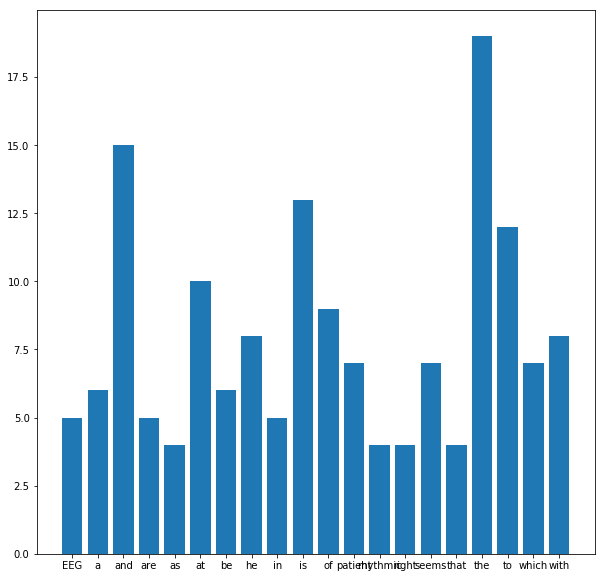

In [247]:
#fDist.most_common(30)
mostCommon = fDist.most_common(20)
xAxisVals = []
yAxisVals = []

plt.figure(figsize=(10,10))
for x in mostCommon:
    xAxisVals.append(x[0])
    yAxisVals.append(x[1])
plt.bar(xAxisVals,yAxisVals)
plt.show()

In [285]:
session = sessions.find_one({})
tseSample = session['tseList'][0]
lblSample = session['lblList'][0]
print(tseSample)
print(lblSample)

with open(str(tseSample),'r') as tseFile:
    tText = tseFile.readlines() 
pprint.pprint(tText)

with open(str(lblSample),'r') as lblFile:
    lText = lblFile.read()
pprint.pprint(lText)

v1.2.0/eval/03_tcp_ar_a/00005943/s002_2009_06_28/00005943_s002_t002.tse
v1.2.0/eval/03_tcp_ar_a/00005943/s002_2009_06_28/00005943_s002_t002.lbl
['version = tse_v1.0.0\n',
 '\n',
 '0.0000 62.9323 bckg 1.0000\n',
 '62.9323 153.2431 fnsz 1.0000\n',
 '153.2431 405.0000 bckg 1.0000\n']
('\n'
 'version = lbl_v1.0.0\n'
 '\n'
 'montage = 0, FP1-F7: EEG FP1-REF --  EEG F7-REF\n'
 'montage = 1, F7-T3:  EEG F7-REF  --  EEG T3-REF\n'
 'montage = 2, T3-T5:  EEG T3-REF  --  EEG T5-REF\n'
 'montage = 3, T5-O1:  EEG T5-REF  --  EEG O1-REF\n'
 'montage = 4, FP2-F8: EEG FP2-REF --  EEG F8-REF\n'
 'montage = 5, F8-T4:  EEG F8-REF  --  EEG T4-REF\n'
 'montage = 6, T4-T6:  EEG T4-REF  --  EEG T6-REF\n'
 'montage = 7, T6-O2:  EEG T6-REF  --  EEG O2-REF\n'
 'montage = 8, T3-C3:  EEG T3-REF  --  EEG C3-REF\n'
 'montage = 9, C3-CZ:  EEG C3-REF  --  EEG CZ-REF\n'
 'montage = 10, CZ-C4:  EEG CZ-REF  --  EEG C4-REF\n'
 'montage = 11, C4-T4:  EEG C4-REF  --  EEG T4-REF\n'
 'montage = 12, FP1-F3: EEG FP1-REF --  EE